<a href="https://colab.research.google.com/github/prasadwagh2503/Rossmann-Retail-Sales-Predictions/blob/main/Prasad_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**


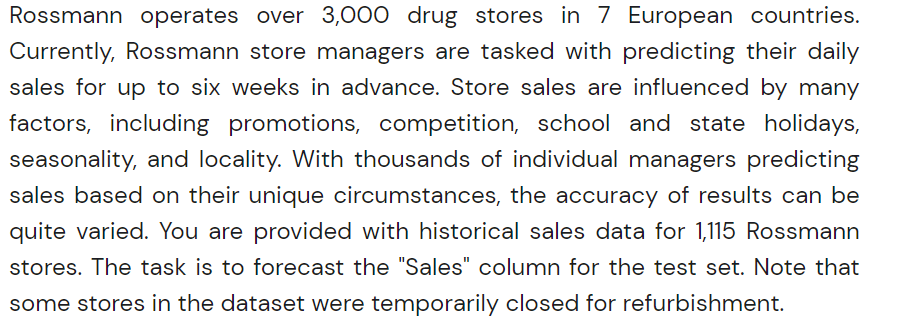

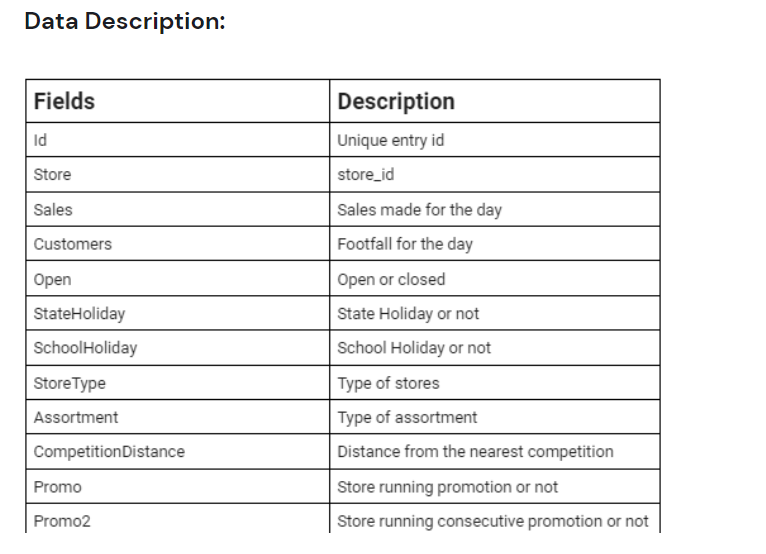

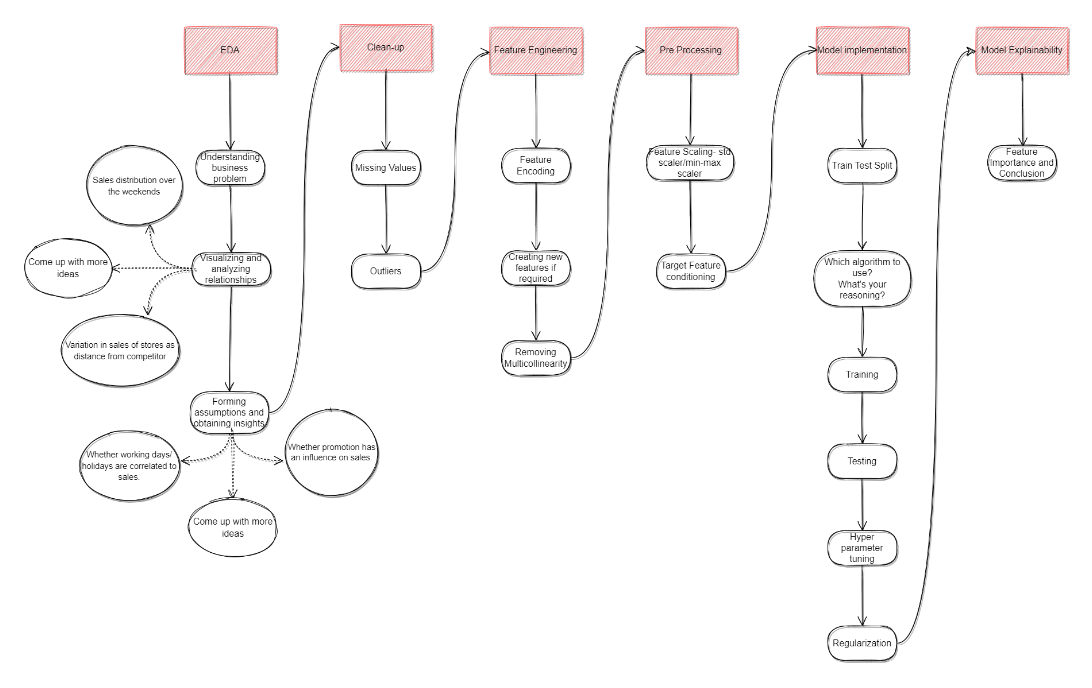

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import missingno as msno

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rossman_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone 2 : Regression/Retail Sales Prediction/Data & Resources/Rossmann Stores Data.csv')

In [ ]:
stores_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone 2 : Regression/Retail Sales Prediction/Data & Resources/store.csv')

### Dataset First View

In [ ]:
#First look
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossman_df['Sales'].max()

41551

In [ ]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
stores_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rossman_df.shape,stores_df.shape

((1017209, 9), (1115, 10))

### Dataset Information

In [ ]:
# Dataset Info
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
rossman_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [ ]:
stores_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
#Percentage of null values in stores_df
100*stores_df.isnull().sum()/stores_df.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

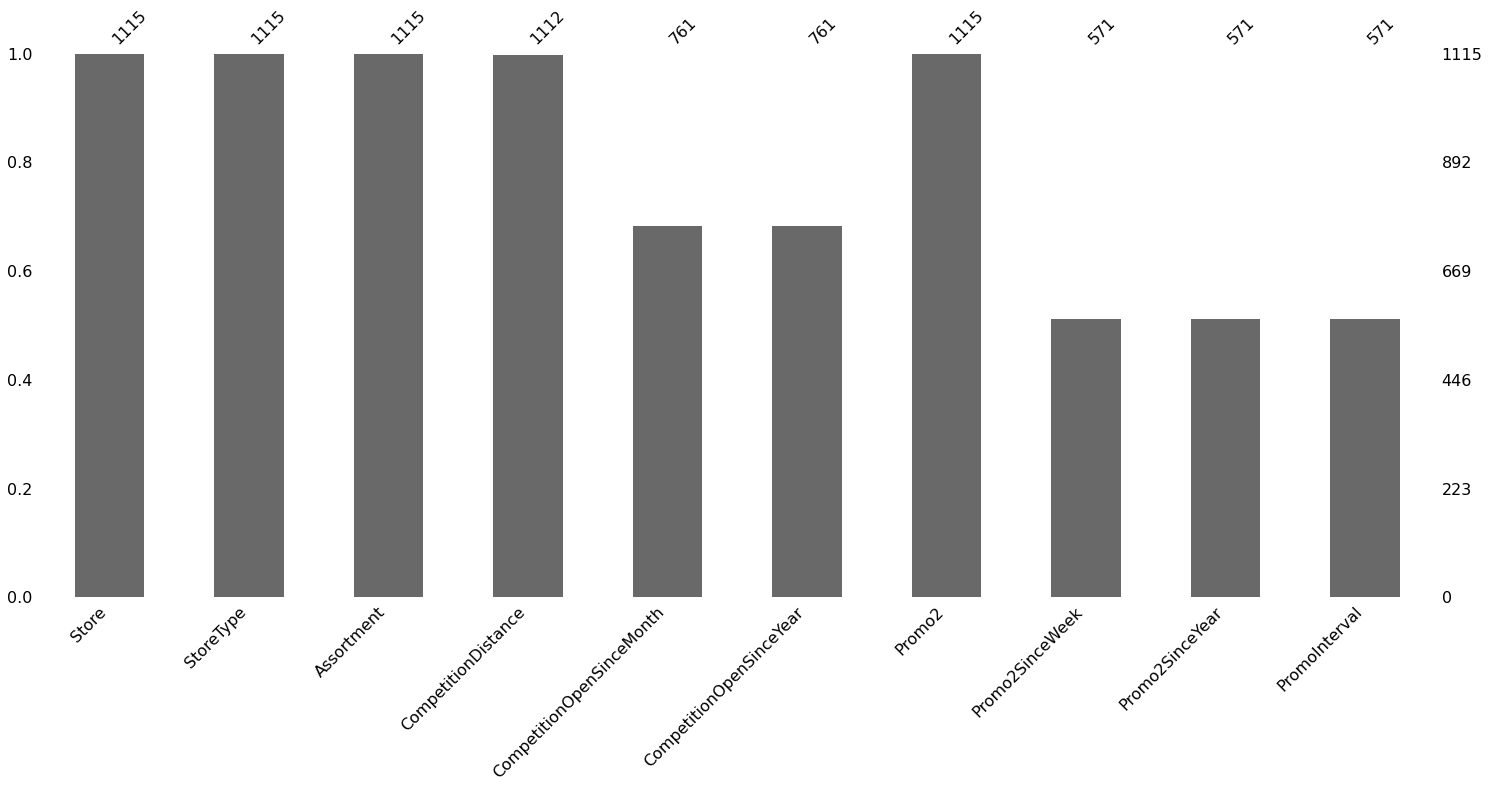

In [ ]:
# Visualizing the missing values
msno.bar(stores_df)

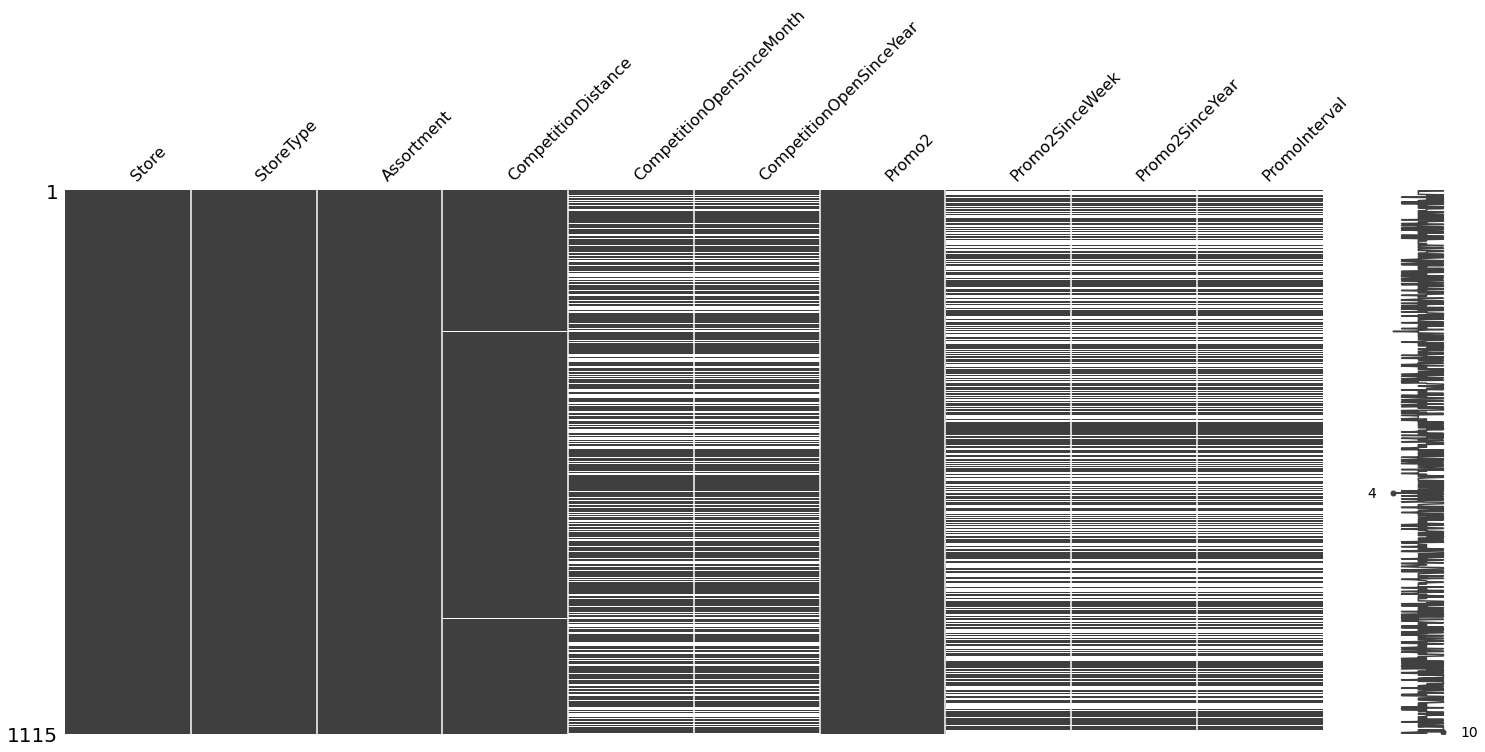

In [ ]:
msno.matrix(stores_df)

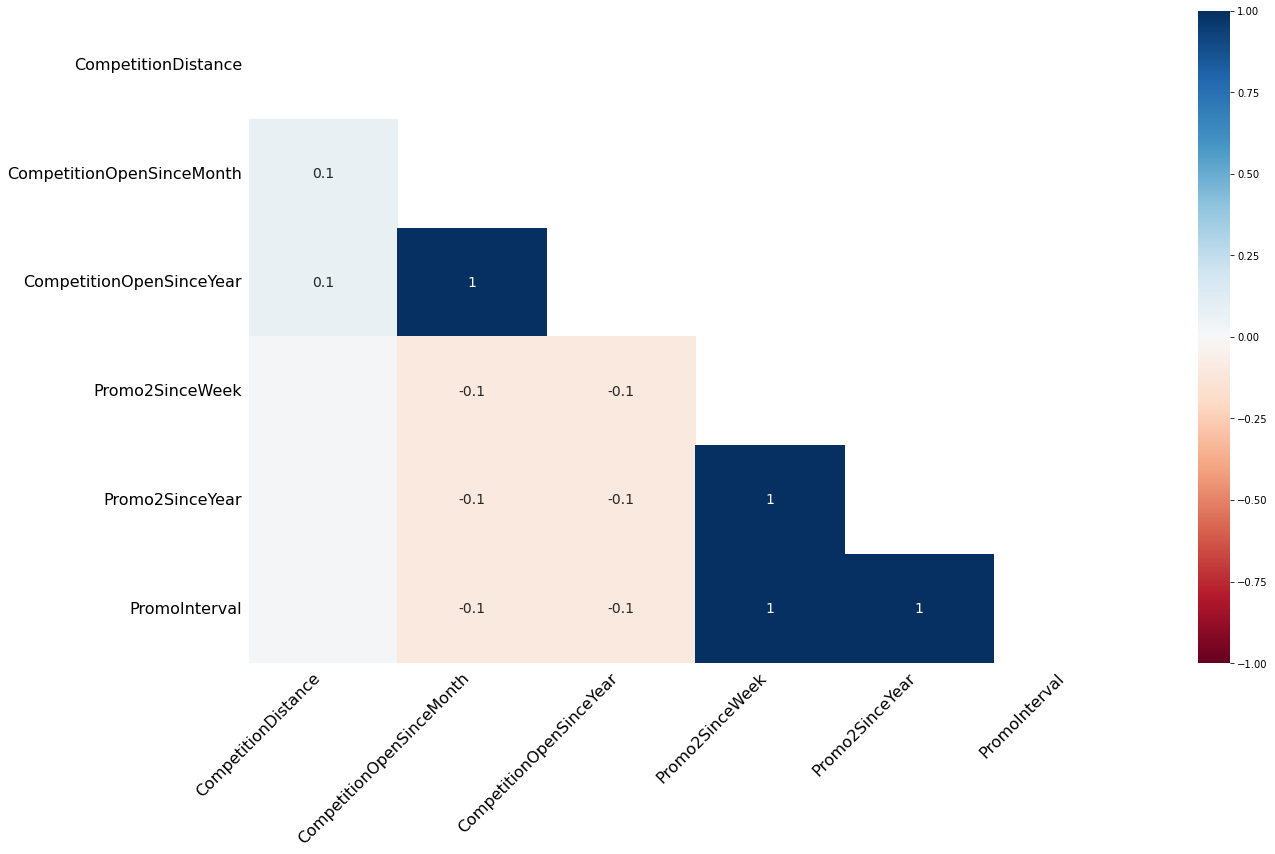

In [ ]:
msno.heatmap(stores_df)

### What did you know about your dataset?

This dataset is about Rossman stores and it's sale. It has various factors that are contributing to the sale and we are supposed to build a model around thise attributes.

## ***2. Understanding Your Variables***

In [ ]:
#Dataset Columns
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
stores_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
rossman_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
stores_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
variables_in_rossman_df=rossman_df.columns.to_list()
variables_in_stores_df=stores_df.columns.to_list()

In [ ]:
#rossman_df
for i in variables_in_rossman_df:
  print('The Unique Values of', i, 'are:', rossman_df[i].unique())

The Unique Values of Store are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of DayOfWeek are: [5 4 3 2 1 7 6]
The Unique Values of Date are: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '201

In [ ]:
#stores_df
for i in variables_in_stores_df:
  print('The Unique Values of', i, 'are:', stores_df[i].unique())

The Unique Values of Store are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of StoreType are: ['c' 'a' 'd' 'b']
The Unique Values of Assortment are: ['a' 'c' 'b']
The Unique Values of CompetitionDistance are: [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
#Treating null values of 2nd data set

#CompetitionDistance replaced with median.
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(),inplace=True)

#CompetitionOpenSinceMonth,CompetitionOpenSinceYear replaced with Zero as no data is given.
stores_df['CompetitionOpenSinceMonth']=stores_df['CompetitionOpenSinceMonth'].fillna(0)
stores_df['CompetitionOpenSinceYear']=stores_df['CompetitionOpenSinceYear'].fillna(0)

#Promo2SinceWeek,Promo2SinceYear,PromoInterval replaced with Zero.
stores_df['Promo2SinceWeek']=stores_df['Promo2SinceWeek'].fillna(0)
stores_df['Promo2SinceYear']=stores_df['Promo2SinceYear'].fillna(0)
stores_df['PromoInterval']=stores_df['PromoInterval'].fillna(0)

In [ ]:
#Checking the null values in 2nd dataset
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

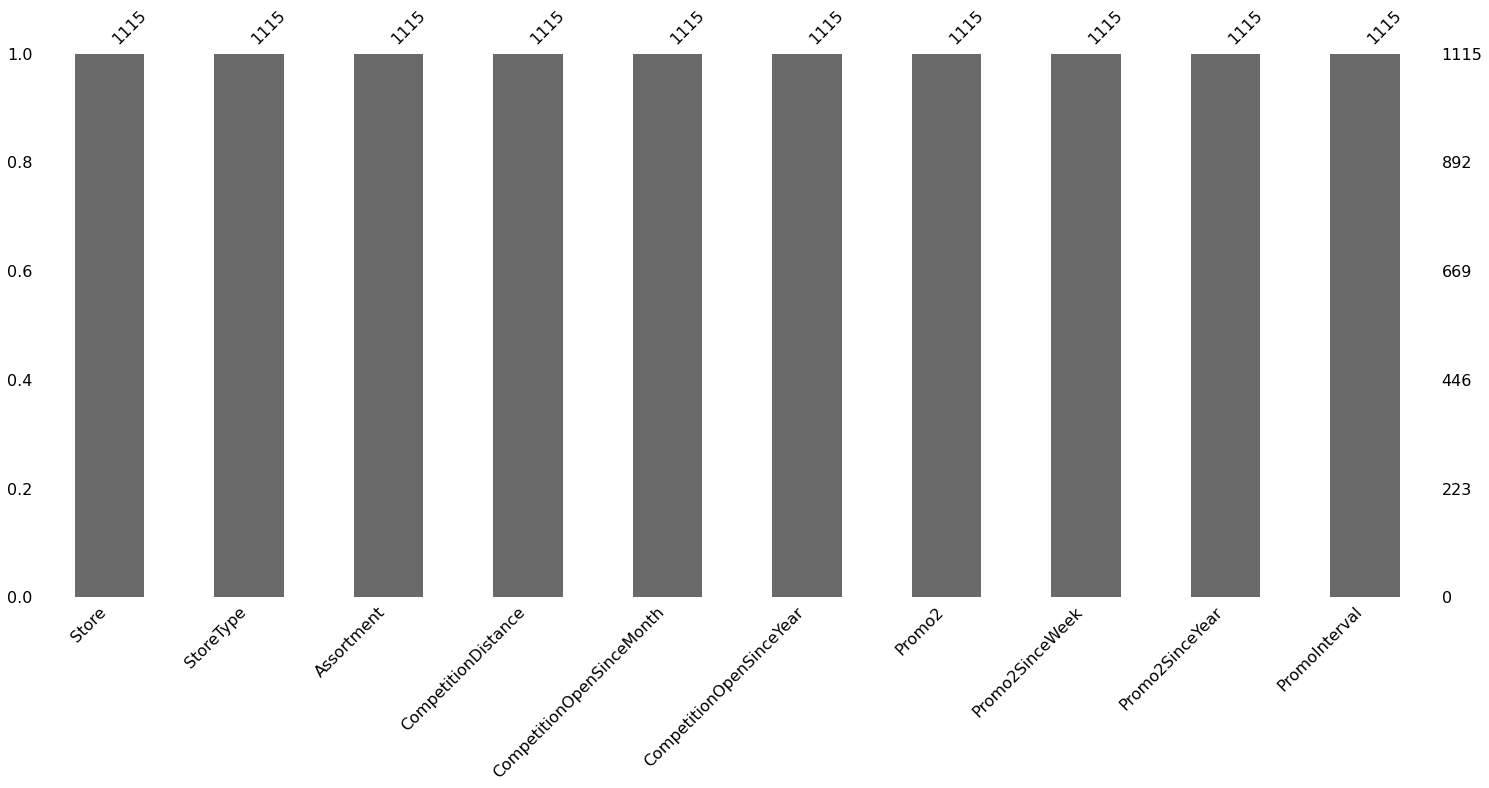

In [ ]:
#Let's confirm the null values again
msno.bar(stores_df)

In [ ]:
#merging both the dataframes. Using inner join for better results.

merged_df = rossman_df.merge(stores_df,how='inner',left_on='Store',right_on='Store')  

## We did inner join on these 2 datasets on the Store column

In [ ]:
merged_df.shape

(1017209, 18)

In [ ]:
#converting dtypes now.

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# changing dtype into required format from both the datasets
merged_df["Date"]= pd.to_datetime(merged_df["Date"],format="%Y/%m/%d")
merged_df["CompetitionDistance"]= merged_df["CompetitionDistance"].astype(int)
merged_df["CompetitionOpenSinceMonth"]= merged_df["CompetitionOpenSinceMonth"].astype(int)
merged_df["CompetitionOpenSinceYear"]= merged_df["CompetitionOpenSinceYear"].astype(int)
merged_df["Promo2SinceWeek"]= merged_df["Promo2SinceWeek"].astype(int)
merged_df["Promo2SinceYear"]= merged_df["Promo2SinceYear"].astype(int)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
merged_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
merged_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [ ]:
merged_df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [ ]:
merged_df['PromoInterval'].value_counts()

0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1- Null Hypothesis - There is no relation between PromoOpen and Sales

Alternate Hypothesis - There is a relationship between promoOpen and sales

2- Null Hypothesis - There is no relation between Customers and Sales

Alternate Hypothesis - There is a relationship between Customers and sales

3- Null Hypothesis - There is no relation between Customers and Sales

Alternate Hypothesis - There is a relationship between Customers and sales

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
merged_df.describe(include='all').columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# assigning continous variable features in new variables so that it makes sense while visualizing through box plots
continous_value_feature= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]
print("Numeric_features: ",numeric_features)
print("Categorical_features: ",categorical_features)
print("Continous_value_feature: ",continous_value_feature)

Numeric_features:  ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
Categorical_features:  ['Date', 'StoreType', 'Assortment', 'PromoInterval']
Continous_value_feature:  ['DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']


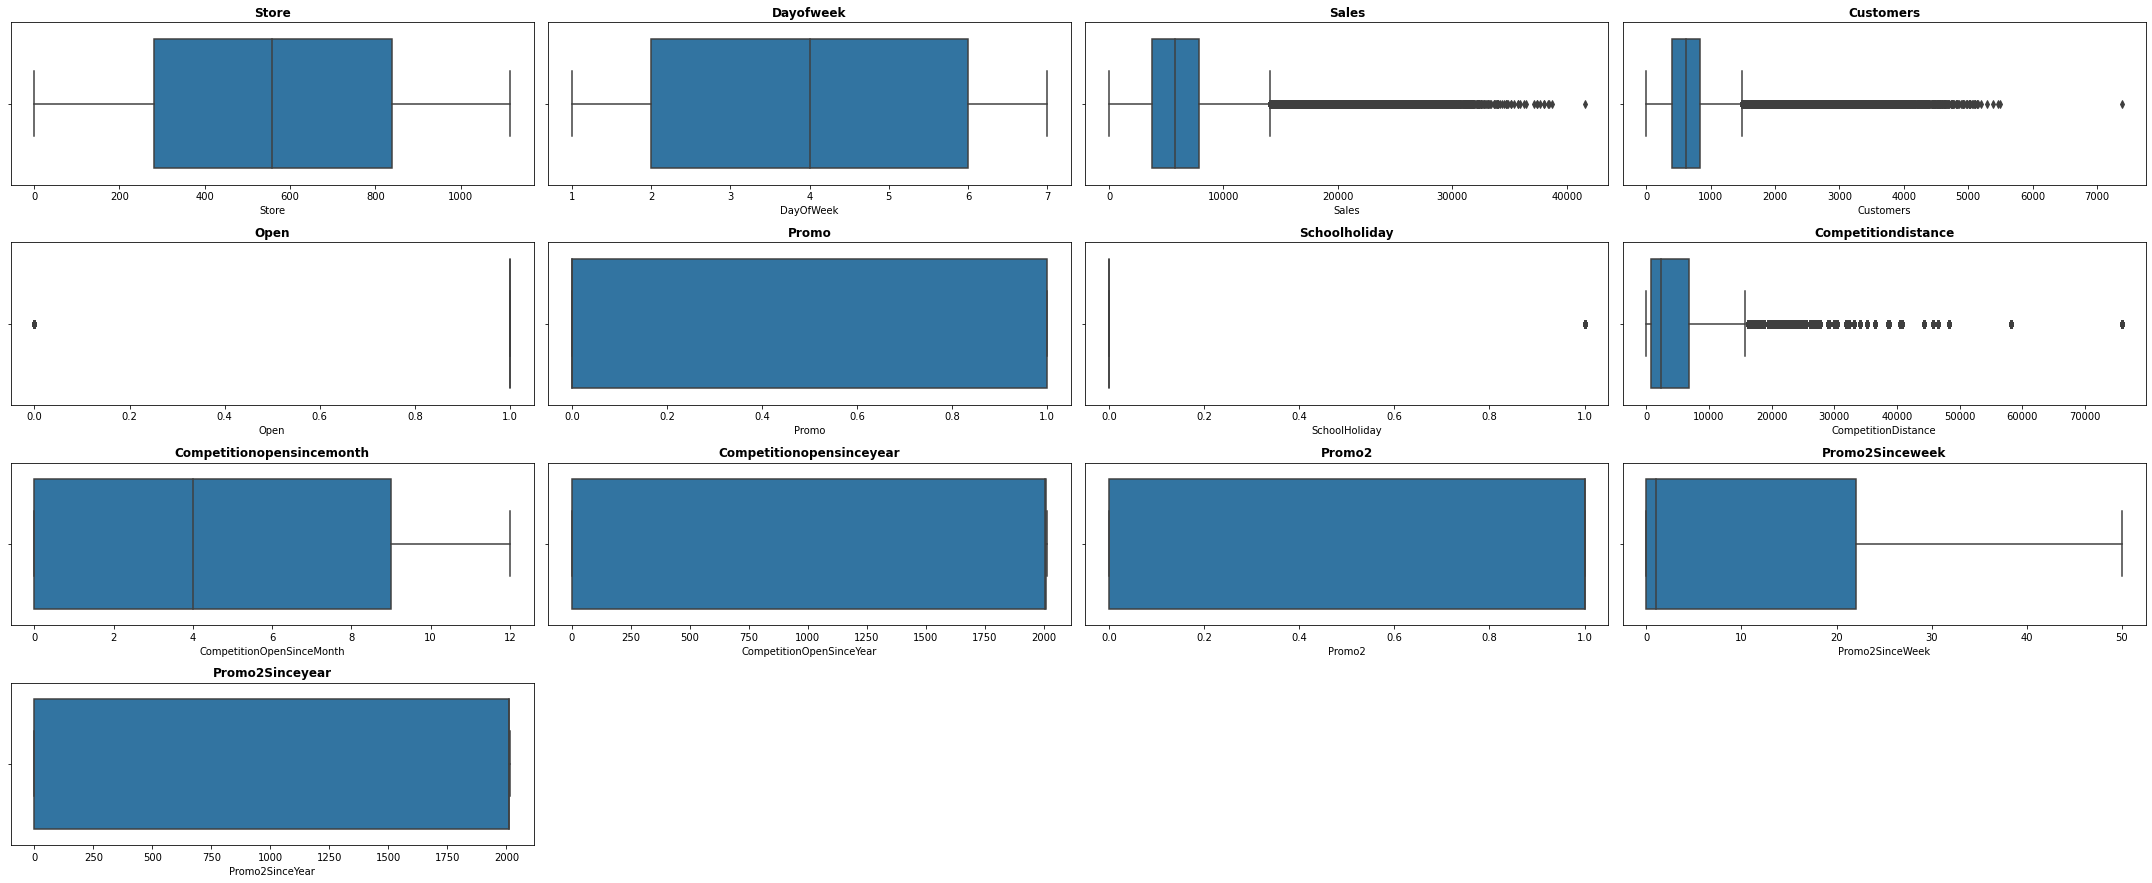

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(30,15))
for n,column in enumerate(merged_df.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(merged_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here we can observe that there are outliers in various features like:

1.   Sales
2.   Customers
3.   Competition distance
4.   Competition open since year



The interquartile range (IQR) is a measure of dispersion that is used to
identify and handle outliers in a dataset. It is defined as the difference between the 75th percentile and the 25th percentile of the data, and it is a robust measure of dispersion that is not affected by outliers.

In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Print the outliers
    print("Outliers:", outliers)
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data

In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continous_value_feature:
  merged_df[feature]= treat_outliers_iqr(merged_df[feature])

Outliers: []
Outliers: [15689, 14461, 14555, 14647, 16106, 15018, 17311, 14451, 16860, 15839, 14572, 15110, 14052, 15595, 15672, 15274, 14743, 14638, 17412, 16941, 14207, 14757, 14471, 16843, 14106, 14870, 14669, 16910, 15344, 14869, 14838, 14160, 14335, 14590, 14580, 16763, 15268, 14130, 15349, 15399, 14428, 16037, 14230, 14237, 16186, 14451, 14900, 18413, 15705, 14766, 15155, 15356, 17567, 14636, 15123, 17111, 16610, 15026, 15466, 15835, 16462, 17724, 15072, 14087, 14461, 22822, 14764, 17565, 16402, 19659, 18351, 20943, 16727, 14805, 14265, 14079, 16747, 15288, 14160, 16251, 14280, 17845, 14671, 14190, 18220, 16618, 15726, 16843, 14672, 15705, 16657, 15163, 14578, 17059, 18297, 14590, 14767, 18596, 18178, 14344, 14912, 15194, 16729, 19168, 14169, 15046, 15372, 16957, 15968, 15409, 22015, 14498, 14051, 14460, 18155, 14106, 16140, 14860, 14450, 21299, 17476, 14895, 16182, 16666, 21022, 16894, 14177, 15577, 16721, 14302, 14710, 14180, 16572, 14621, 14639, 16017, 16048, 18272, 14376, 156

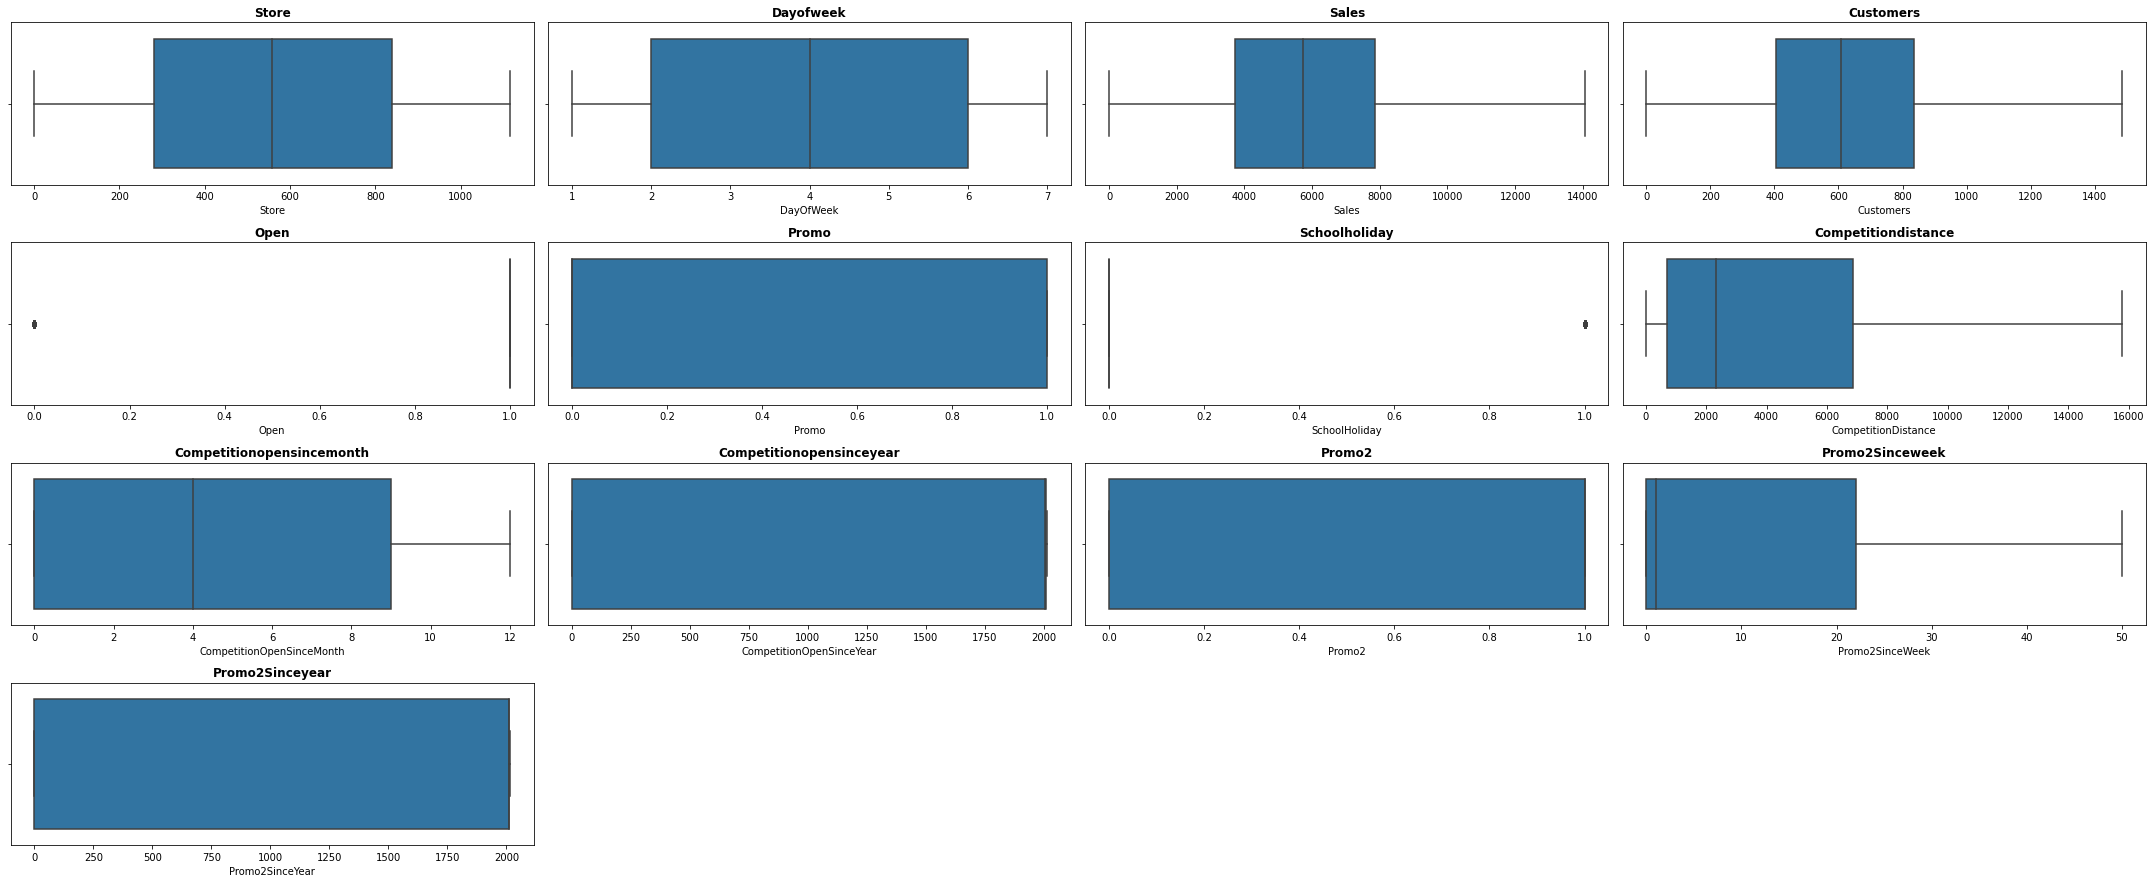

In [ ]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(merged_df.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(merged_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
# creating the variable that contains list of "object" dtypes
obj= ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

In [ ]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {merged_df[unique].unique()}")
  print(f"Total number of unique values are: {merged_df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: ['0' 'a' 'b' 'c' 0]
Total number of unique values are: 5


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




In [ ]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
merged_df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

In [ ]:
# rechecking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {merged_df[unique].unique()}")
  print(f"Total number of unique values are: {merged_df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: [0 1]
Total number of unique values are: 2


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




In [ ]:
# Encode your categorical columns by droppin the first category
merged_df_new= pd.get_dummies(merged_df, dtype=int, drop_first=True)

In [ ]:
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  float64       
 4   Customers                       1017209 non-null  float64       
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  float64       
 10  CompetitionOpenSinceMonth       1017209 no

In [ ]:
# changing dtype into required format from both the datasets

merged_df_new["Sales"]= merged_df_new["Sales"].astype(int)
merged_df_new["Customers"]= merged_df_new["Customers"].astype(int)
merged_df_new["CompetitionDistance"]= merged_df_new["CompetitionDistance"].astype(int)
merged_df_new["CompetitionOpenSinceMonth"]= merged_df_new["CompetitionOpenSinceMonth"].astype(int)
merged_df_new["CompetitionOpenSinceYear"]= merged_df_new["CompetitionOpenSinceYear"].astype(int)


In [ ]:
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  int64         
 10  CompetitionOpenSinceMonth       1017209 no

In [ ]:
# code to see all the features
pd.set_option('display.max_columns', None)

In [ ]:
merged_df_new.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
5,1,7,2015-07-26,0,0,0,0,0,0,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
6,1,6,2015-07-25,4364,500,1,0,0,0,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
7,1,5,2015-07-24,3706,459,1,0,0,0,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
8,1,4,2015-07-23,3769,503,1,0,0,0,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
9,1,3,2015-07-22,3464,463,1,0,0,0,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
merged_df_new.shape

(1017209, 23)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  int64         
 10  CompetitionOpenSinceMonth       1017209 no

###**Let's do following manipulations for better results:**


1.   Remove store column
2.   Extract date column
4.   Merge competitionopensincemonth and competitionopensinceyear= CompetitionDuration -> Duration from which two stores are competiting
3.   Merge promo2sinceweek and promo2sinceyear= Promo2Open -> Duration from which the store is involved in consecutive promotions
5. Dropping those observations where store is closed.      



In [ ]:
#removing store column
merged_df_new.drop('Store', axis=1, inplace=True)

In [ ]:
merged_df_new.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
#Extracting date column and dropping the original date column
merged_df_new["Day"]= merged_df_new["Date"].dt.day
merged_df_new["Month"]= merged_df_new["Date"].dt.month
merged_df_new["Year"]= merged_df_new["Date"].dt.year
merged_df_new["Week"]= merged_df_new["Date"].dt.week

merged_df_new.drop('Date', axis=1, inplace=True)

In [ ]:
merged_df_new.head(20)

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Day,Month,Year,Week
0,5,5263,555,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,31,7,2015,31
1,4,5020,546,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,30,7,2015,31
2,3,4782,523,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,29,7,2015,31
3,2,5011,560,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,28,7,2015,31
4,1,6102,612,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,27,7,2015,31
5,7,0,0,0,0,0,0,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,26,7,2015,30
6,6,4364,500,1,0,0,0,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,25,7,2015,30
7,5,3706,459,1,0,0,0,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,24,7,2015,30
8,4,3769,503,1,0,0,0,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,23,7,2015,30
9,3,3464,463,1,0,0,0,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,22,7,2015,30


In [ ]:
merged_df_new.shape

(1017209, 25)

In [ ]:
#Let's see for how long a competition has been opened for:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [ ]:
comp_months(merged_df_new)

In [ ]:
merged_df_new.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Day,Month,Year,Week,CompetitionOpen
0,5,5263,555,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,31,7,2015,31,82
1,4,5020,546,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,30,7,2015,31,82
2,3,4782,523,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,29,7,2015,31,82
3,2,5011,560,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,28,7,2015,31,82
4,1,6102,612,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,27,7,2015,31,82


In [ ]:
#Let's drop CompetitionOpenSinceMonth and CompetitionOpenSinceYear as we have created CompetitionOpen as the new feature.
merged_df_new.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], inplace=True, axis=1)

In [ ]:
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                          Non-Null Count    Dtype
---  ------                          --------------    -----
 0   DayOfWeek                       1017209 non-null  int64
 1   Sales                           1017209 non-null  int64
 2   Customers                       1017209 non-null  int64
 3   Open                            1017209 non-null  int64
 4   Promo                           1017209 non-null  int64
 5   StateHoliday                    1017209 non-null  int64
 6   SchoolHoliday                   1017209 non-null  int64
 7   CompetitionDistance             1017209 non-null  int64
 8   Promo2                          1017209 non-null  int64
 9   Promo2SinceWeek                 1017209 non-null  int64
 10  Promo2SinceYear                 1017209 non-null  int64
 11  StoreType_b                     1017209 non-null  int64
 12  StoreType_c                 

In [ ]:
#Let's check from when the store is offering consecutive promotions:
def promo_cols(df_new):
    # Months since Promo2 was open
    df_new['Promo2Open'] = 12 * (df_new.Year - df_new.Promo2SinceYear) +  (df_new.Week - df_new.Promo2SinceWeek)*7/30.5
    df_new['Promo2Open'] = df_new['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df_new['Promo2']

In [ ]:
promo_cols(merged_df_new)

In [ ]:
merged_df_new.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Day,Month,Year,Week,CompetitionOpen,Promo2Open
0,5,5263,555,1,1,0,1,1270,0,0,0,0,1,0,0,0,0,0,0,31,7,2015,31,82,0.0
1,4,5020,546,1,1,0,1,1270,0,0,0,0,1,0,0,0,0,0,0,30,7,2015,31,82,0.0
2,3,4782,523,1,1,0,1,1270,0,0,0,0,1,0,0,0,0,0,0,29,7,2015,31,82,0.0
3,2,5011,560,1,1,0,1,1270,0,0,0,0,1,0,0,0,0,0,0,28,7,2015,31,82,0.0
4,1,6102,612,1,1,0,1,1270,0,0,0,0,1,0,0,0,0,0,0,27,7,2015,31,82,0.0


In [ ]:
#Let's drop Promo2SinceYear and Promo2SinceWeek as we have created Promo2Open as the new feature.
merged_df_new.drop(['Promo2SinceYear','Promo2SinceWeek','Year','Week','Month'], inplace=True, axis=1)

In [ ]:
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   DayOfWeek                       1017209 non-null  int64  
 1   Sales                           1017209 non-null  int64  
 2   Customers                       1017209 non-null  int64  
 3   Open                            1017209 non-null  int64  
 4   Promo                           1017209 non-null  int64  
 5   StateHoliday                    1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   CompetitionDistance             1017209 non-null  int64  
 8   Promo2                          1017209 non-null  int64  
 9   StoreType_b                     1017209 non-null  int64  
 10  StoreType_c                     1017209 non-null  int64  
 11  StoreType_d                     1017209 non-null  int64  
 12  

In [ ]:
#let's change the Promo2Open into int again
merged_df_new['Promo2Open']= merged_df_new['Promo2Open'].astype(int)
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                          Non-Null Count    Dtype
---  ------                          --------------    -----
 0   DayOfWeek                       1017209 non-null  int64
 1   Sales                           1017209 non-null  int64
 2   Customers                       1017209 non-null  int64
 3   Open                            1017209 non-null  int64
 4   Promo                           1017209 non-null  int64
 5   StateHoliday                    1017209 non-null  int64
 6   SchoolHoliday                   1017209 non-null  int64
 7   CompetitionDistance             1017209 non-null  int64
 8   Promo2                          1017209 non-null  int64
 9   StoreType_b                     1017209 non-null  int64
 10  StoreType_c                     1017209 non-null  int64
 11  StoreType_d                     1017209 non-null  int64
 12  Assortment_b                

##**To avoid blunders, let's create a copy of this DF**

In [ ]:
#creating a copy of this dataset
merged_df_copied=merged_df_new.copy()

In [ ]:
merged_df_copied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                          Non-Null Count    Dtype
---  ------                          --------------    -----
 0   DayOfWeek                       1017209 non-null  int64
 1   Sales                           1017209 non-null  int64
 2   Customers                       1017209 non-null  int64
 3   Open                            1017209 non-null  int64
 4   Promo                           1017209 non-null  int64
 5   StateHoliday                    1017209 non-null  int64
 6   SchoolHoliday                   1017209 non-null  int64
 7   CompetitionDistance             1017209 non-null  int64
 8   Promo2                          1017209 non-null  int64
 9   StoreType_b                     1017209 non-null  int64
 10  StoreType_c                     1017209 non-null  int64
 11  StoreType_d                     1017209 non-null  int64
 12  Assortment_b                

In [ ]:
merged_df_copied['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

### **Since, the store was closed for the refurbishment and hence no sales were reported, we can drop the rows where the store is closed.**

In [ ]:
merged_df_final = merged_df_copied.drop(merged_df_copied[(merged_df_copied.Open == 0) & (merged_df_copied.Sales == 0)].index)

In [ ]:
merged_df_final.shape

(844392, 20)

In [ ]:
merged_df_final.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Day,CompetitionOpen,Promo2Open
0,5,5263,555,1,1,0,1,1270,0,0,1,0,0,0,0,0,0,31,82,0
1,4,5020,546,1,1,0,1,1270,0,0,1,0,0,0,0,0,0,30,82,0
2,3,4782,523,1,1,0,1,1270,0,0,1,0,0,0,0,0,0,29,82,0
3,2,5011,560,1,1,0,1,1270,0,0,1,0,0,0,0,0,0,28,82,0
4,1,6102,612,1,1,0,1,1270,0,0,1,0,0,0,0,0,0,27,82,0


In [ ]:
# Dropping "Open" from our dataset as it is of no use.
merged_df_final.drop(columns=["Open"], inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

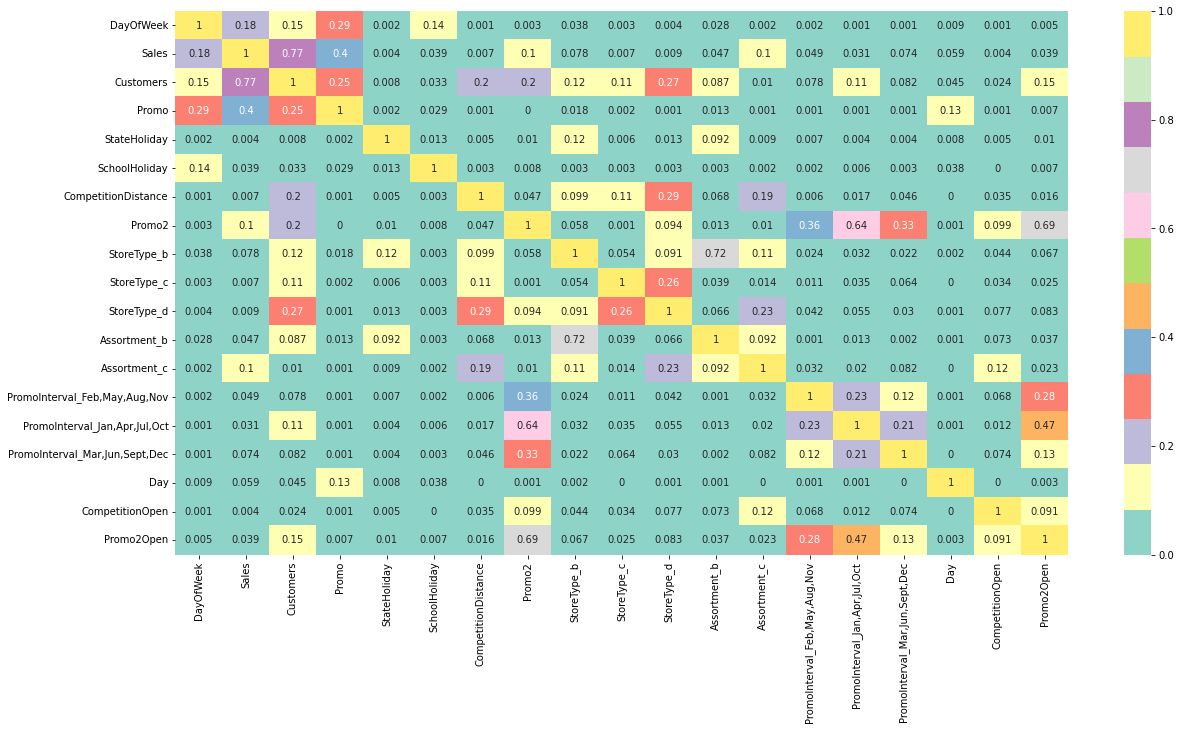

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(abs(round(merged_df_final.corr(),3)), annot=True, cmap=sns.color_palette("Set3"))

In [ ]:
#VIF
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# calculating the vif by excluding the redundant features("Sales -> Dependent variable" and "Store -> ID")
calc_vif(merged_df_final[[i for i in merged_df_final.describe().columns if i not in ["Sales"]]])

,variables,VIF
0,DayOfWeek,4.138386
1,Customers,6.158841
2,Promo,2.059223
3,StateHoliday,1.015320
4,SchoolHoliday,1.246070
5,CompetitionDistance,2.171516
6,Promo2,inf
7,StoreType_b,2.192806
8,StoreType_c,1.262642
9,StoreType_d,1.781298


In [ ]:
#Dropping 'PromoInterval_Jan,Apr,Jul,Oct' and re-running VIF
calc_vif(merged_df_final[[i for i in merged_df_final.describe().columns if i not in ["Sales",'PromoInterval_Jan,Apr,Jul,Oct']]])

,variables,VIF
0,DayOfWeek,4.138386
1,Customers,6.158841
2,Promo,2.059223
3,StateHoliday,1.015320
4,SchoolHoliday,1.246070
5,CompetitionDistance,2.171516
6,Promo2,4.583802
7,StoreType_b,2.192806
8,StoreType_c,1.262642
9,StoreType_d,1.781298


###Now VIF is under 10, let's move ahead!

In [ ]:
# # Let's check X and Y
# Y='Sales'
# X= list(set(merged_df_copied.columns.tolist()) - {Y,'PromoInterval_Jan,Apr,Jul,Oct','Month','Year','Open'})

In [ ]:
# defining dependent variable
dependent_variable = 'Sales'

# defining independent variable
independent_variables = list(merged_df_final.columns.drop(['Sales','PromoInterval_Jan,Apr,Jul,Oct']))

In [ ]:
independent_variables

['DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_b',
 'Assortment_c',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'Day',
 'CompetitionOpen',
 'Promo2Open']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

In [ ]:
merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   DayOfWeek                       844392 non-null  int64
 1   Sales                           844392 non-null  int64
 2   Customers                       844392 non-null  int64
 3   Promo                           844392 non-null  int64
 4   StateHoliday                    844392 non-null  int64
 5   SchoolHoliday                   844392 non-null  int64
 6   CompetitionDistance             844392 non-null  int64
 7   Promo2                          844392 non-null  int64
 8   StoreType_b                     844392 non-null  int64
 9   StoreType_c                     844392 non-null  int64
 10  StoreType_d                     844392 non-null  int64
 11  Assortment_b                    844392 non-null  int64
 12  Assortment_c                    844392 non-

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Continuous_col=['Sales','Customers','CompetitionDistance','CompetitionOpen','Promo2Open']

In [ ]:
# Let's view the distribution of continuous columns
# plt.figure(figsize=(20,5))
# for n,col in enumerate(Continuous_col):
#   plt.subplot(2,3,n+1)
#   sns.distplot(merged_df_copied[col])
#   plt.title(f'Distribution of {col}')
#   plt.tight_layout()

In [ ]:
# Applying transformation on the above considered columns
# merged_df_copied['Sales']=np.sqrt(merged_df_copied['Sales'])
# merged_df_copied['Customers']=np.sqrt(merged_df_copied['Customers'])
# merged_df_copied['CompetitionDistance']=np.log1p(merged_df_copied['CompetitionDistance'])
# merged_df_copied['Promo2Open']=1/(merged_df_copied['Promo2Open'])
# merged_df_copied['CompetitionOpen']=np.log1p(merged_df_copied['CompetitionOpen'])

### 6. Data Scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Create the data of independent variables
X = merged_df_final[independent_variables].values

# Create the data of dependent variable
y = merged_df_final[dependent_variable].values

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 17)
(168879, 17)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### **Linear Regression**

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.6985777359515952

In [ ]:
reg.coef_

array([-4.48652810e+01,  1.13017160e+04,  9.87331575e+02, -9.98578343e+01,
        5.26660199e+01,  8.88523428e+02,  7.63570011e+01,  7.38608411e+02,
       -1.70594096e+02,  9.12685982e+02, -5.77821867e+02,  3.03729003e+02,
       -1.47587675e+02, -2.38027524e+02,  8.46072105e+00, -6.70220741e+01,
        6.43045303e+02])

In [ ]:
reg.intercept_

135.82723694462038

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([7276.21247388, 5685.56422059, 8080.48616077, ..., 6894.69379577,
       6162.22694063, 5672.10301518])

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([4144.89391544, 8187.26439352, 8097.67625746, ..., 7673.28501843,
       8816.9659794 , 6487.56813203])

In [ ]:
y_test

array([6859, 4066, 8676, ..., 7592, 7519, 5838], dtype=int64)

In [ ]:
y_train

array([3532, 6927, 6365, ..., 9628, 8470, 5905], dtype=int64)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1800447.9978366476
RMSE : 1341.8077350487467


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.696878852621035


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **Lasso**

In [ ]:
L1 = Lasso(alpha = 0.2, max_iter=10000)

In [ ]:
L1.fit(X_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
y_pred_lasso = L1.predict(X_test)

In [ ]:
L1.score(X_test, y_test)

0.6968642837988815

In [ ]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,6859,7273.374615
1,4066,5687.285378
2,8676,8082.537741
3,10004,10048.392922
4,7856,7671.151185
...,...,...
168874,7867,6958.610530
168875,2493,3765.758677
168876,7592,6895.858286
168877,7519,6166.014578


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **Ridge**

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
L2 = Ridge(alpha = 0.5)

In [ ]:
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
L2.predict(X_test)

array([7276.16125564, 5685.6433331 , 8080.49060968, ..., 6894.64562421,
       6162.18277257, 5672.109639  ])

In [ ]:
L2.score(X_test, y_test)

0.6968788009360182

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

###**Decision Tree**

In [ ]:
sales_mean=merged_df_final['Sales'].mean()

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)


MSE : 1649108.4595979436
RMSE : 1284.17617934532
RMPSE : 0.19282728837506916
R2 : 0.722358185836901


###**Random Forest**

In [ ]:
# Create the data of independent variables
U = merged_df_final[independent_variables].values

# Create the dependent variable data
v = merged_df_final[dependent_variable].values

In [ ]:
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size=0.25, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(633294, 17)
(211098, 17)


In [ ]:
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)
random_forest=RandomForestRegressor(n_estimators =50,max_depth=15)
random_forest.fit(U_train, v_train)
v_pred_rf=random_forest.predict(U_test)
MSE  = mean_squared_error(v_test, v_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rf)
print("R2 :" ,r2)


MSE : 631618.0954220195
RMSE : 794.7440439676283
RMPSE : 0.11933591466292526
R2 : 0.8936496304835454


###**Light GBM**


In [ ]:
model=lgb.LGBMRegressor(n_estimators=700)
model.fit(U_train,v_train)
v_pred_lgb=model.predict(U_test)

In [ ]:
MSE  = mean_squared_error(v_test, v_pred_lgb)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_lgb)
print("R2 :" ,r2)

MSE : 517272.836555917
RMSE : 719.2168216580567
RMPSE : 0.10799501789914914
R2 : 0.9129028162630621


###**XGBoost Regression**

In [ ]:
# import the regressor
from xgboost import XGBRegressor
  
# create a regressor object
xgbR = XGBRegressor(learning_rate=0.20, max_depth=10) 
  
# fit the regressor with X and Y data
xgbR.fit(X_train, y_train)

# predict the model
y_train_xgbR_pred= xgbR.predict(X_train)
y_test_xgbR_pred= xgbR.predict(X_test)

[06:02:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
MSE  = mean_squared_error(v_test, v_pred_lgb)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_lgb)
print("R2 :" ,r2)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***